### Getting started with MNE

#### Installation
We're using the MNE Python framework and install it with Anaconda. On MacOS, use Homebrew to install Anaconda (I like to use the barebones version `miniconda`), create a virtual environment and then install MNE and its dependencies:

```
~> brew install miniconda
~> conda create --name eeg --user
~> source activate eeg
(eeg)~> conda config --add channels conda-forge
(eeg)~> conda install -c conda-forge mne
```

#### Jupyter Notebook
If you want to use MNE in a Jupyter notebook (recommended), install it and the conda kernel extension, and then register the kernel with IPython (optional, if you start Jupyter from inside the virtual environment):
```
(eeg)~> conda install nb_conda
(eeg)~> ipython kernel install --name 'Python3 (conda-eeg)' --user
```
If you want to display and run Jupyter notebooks without starting the service in a particular folder, I recommend using the [Nteract app](https://nteract.io/).

#### Setup
First, you want to load the necessary modules and set a few preferences to make the notebook more readable - plot interactivity and sizing, supress warnings, etc.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.75, 4.0)

import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")

import mne
mne.utils.set_log_level('error')

#### Load data
Next, you read in the EEG data. In the cell below, I loaded the event markers manually with a private function, because the event channel 'STI 014' in the raw object ended up missing some events.
TODO: You probably also want to load an electrode layout to be used for e.g. source localization.

In [4]:
raw = mne.io.read_raw_brainvision("../data/reinhartlab/dt_2/Raw/DT_PC_1002.vhdr", eog=["TVEOG","BVEOG","LHEOG","RHEOG"], preload=True)
events = mne.io.brainvision.brainvision._read_vmrk_events(fname='../data/reinhartlab/dt_2/Raw/DT_PC_1002.vmrk')

#### Inspect data
Let's take a first look at the data - info, channels, time series and events.

In [110]:
raw.info

<Info | 18 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | TVEOG, Fz, F3, F7, LHEOG, FC5, FC1, C3, T7, ...
    chs : list | 64 items (EOG: 4, EEG: 59, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 63 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : int | 1543160802
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    s

In [107]:
str(raw.ch_names)

"['TVEOG', 'Fz', 'F3', 'F7', 'LHEOG', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'RHEOG', 'FC6', 'FC2', 'F4', 'F8', 'BVEOG', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz', 'STI 014']"

<IPython.core.display.Javascript object>


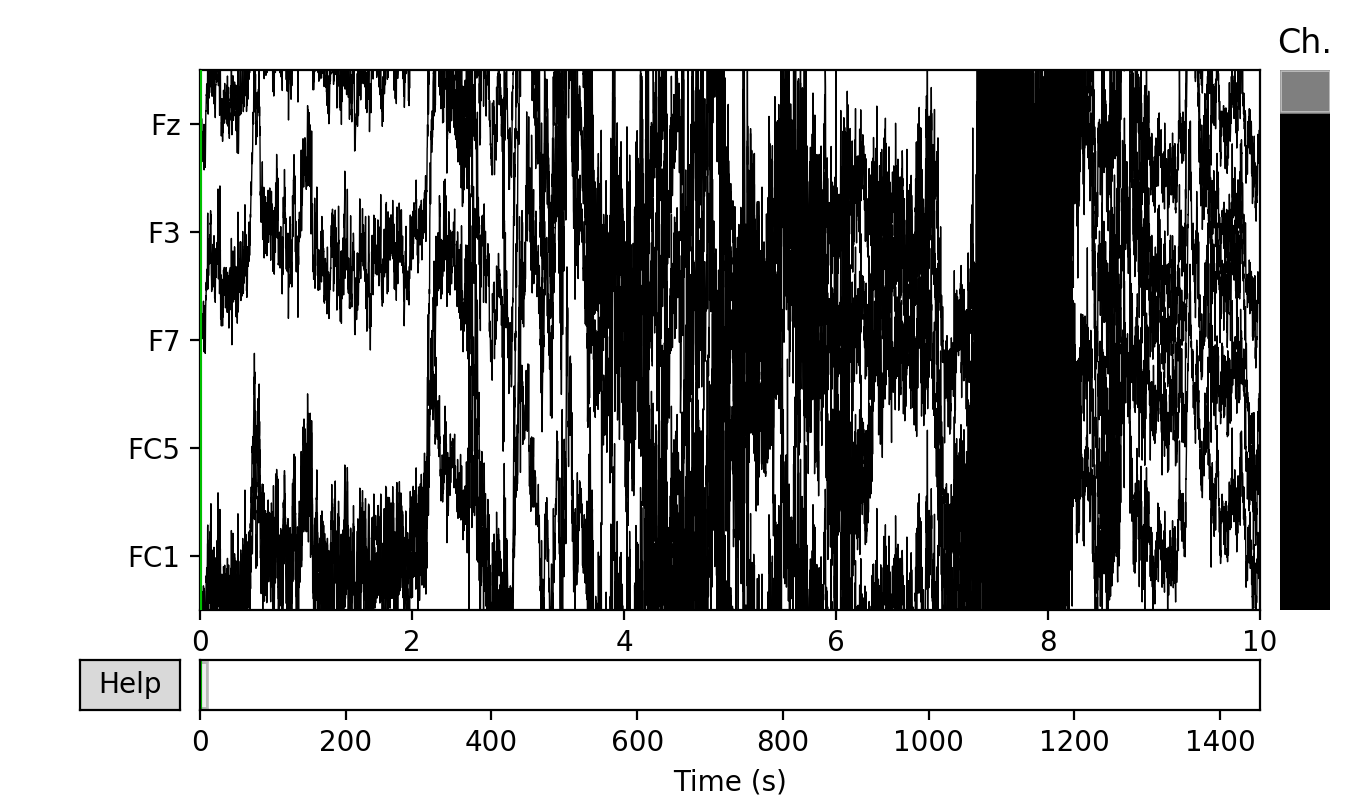

In [111]:
raw.plot(n_channels=5);

<IPython.core.display.Javascript object>


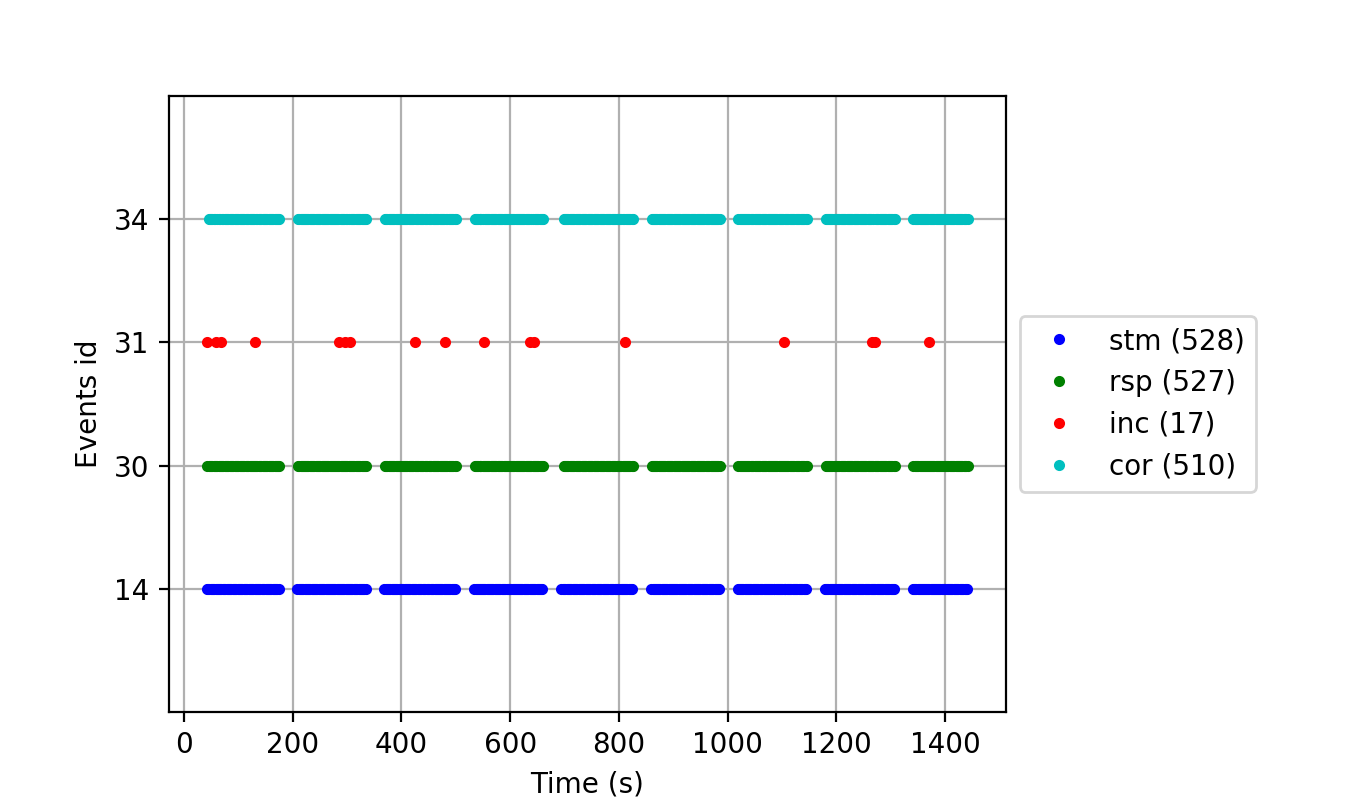

In [106]:
event_id = {"stm":14,"rsp":30,"cor":34,"inc":31};
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,event_id=event_id);

In [123]:
event_id = {"correct":34,"incorrect":31};
tmin,tmax = -2.,2.;
picks = mne.pick_types(raw.info,eeg=True,eog=True,stim=True);
epochs = mne.Epochs(raw,events,event_id,tmin,tmax,
                    proj=True,picks=picks,baseline=None,
                    preload=True)

In [124]:
epochs.info

<Info | 18 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | TVEOG, Fz, F3, F7, LHEOG, FC5, FC1, C3, T7, ...
    chs : list | 64 items (EOG: 4, EEG: 59, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 63 items
    events : list | 0 items
    highpass : float | 10.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : int | 1543160802
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    s

In [125]:
data = epochs.get_data()
print(type(data))
print(data.shape)  # n_epochs, n_channels, n_times

<class 'numpy.ndarray'>
(527, 64, 4001)


Now it's time to FILTER!

In [118]:
raw.filter(10,40,fir_design='firwin')

<RawBrainVision  |  DT_PC_1002.eeg, n_channels x n_times : 64 x 1454960 (1455.0 sec), ~710.6 MB, data loaded>

<IPython.core.display.Javascript object>


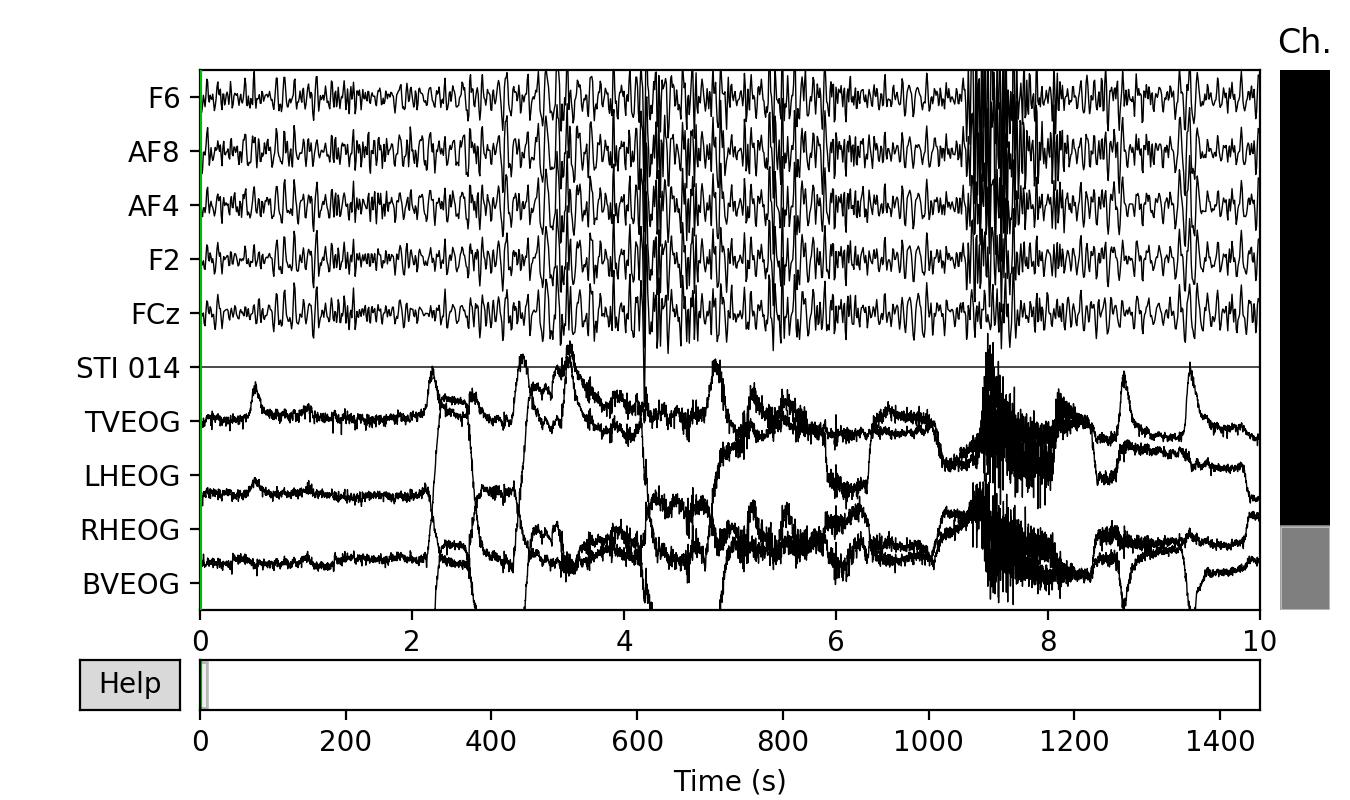

In [119]:
raw.plot(n_channels=10);

Let's do interesting things with the data!

<IPython.core.display.Javascript object>


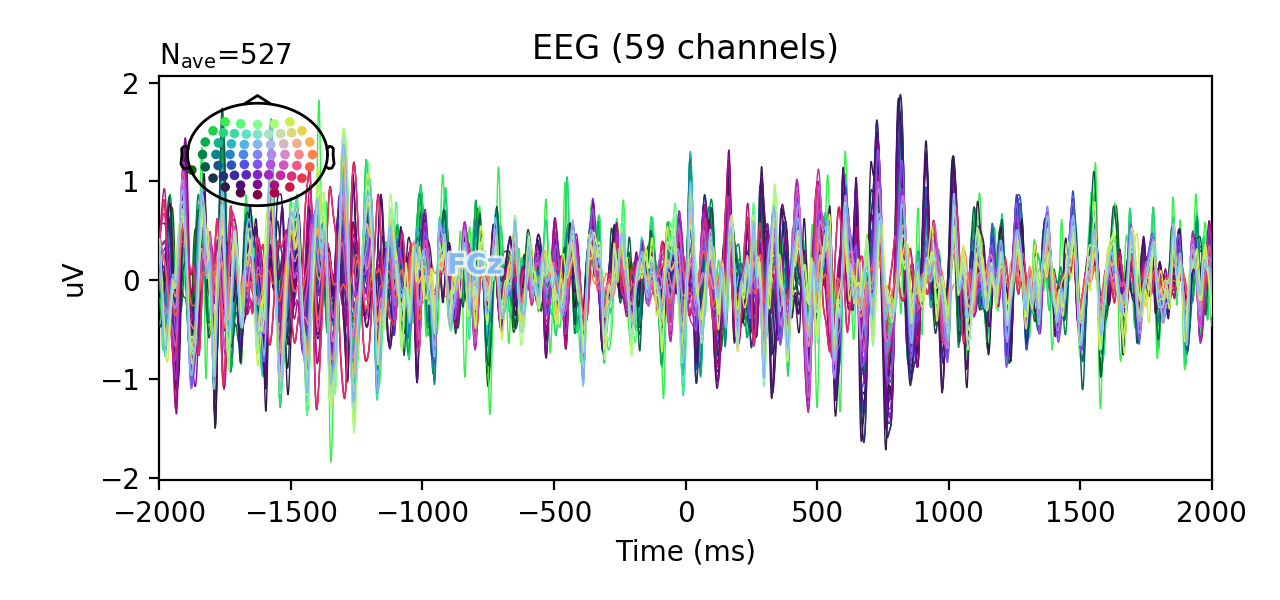

In [128]:
evoked = epochs.average()
evoked.plot(spatial_colors=True);

<IPython.core.display.Javascript object>


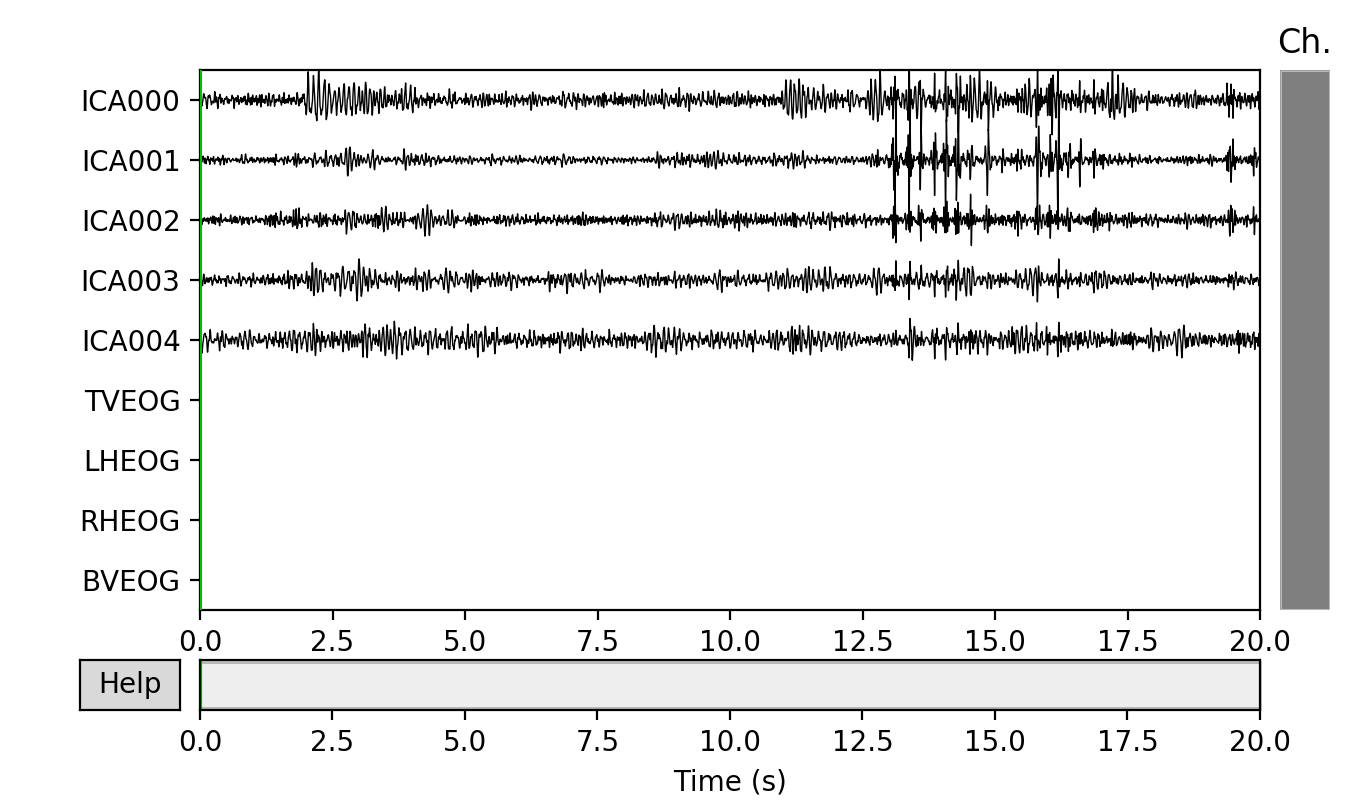

In [131]:
ica = mne.preprocessing.ICA(n_components=.95,random_state=0).fit(epochs);
ica.plot_sources(raw.copy().crop(20,40),picks=range(5));

In [11]:
chan1 = raw.get_data()[0,:];
time = raw.times;

In [45]:
import numpy as np
from bycycle.filt import lowpass_filter, bandpass_filter
from bycycle.cyclepoints import find_extrema
signal_low = lowpass_filter(chan1,1000,25)+.00318;
signal_theta = bandpass_filter(chan1,1000,(4,10));
Ps, Ts = find_extrema(signal_low,1000,(4,10));

<IPython.core.display.Javascript object>


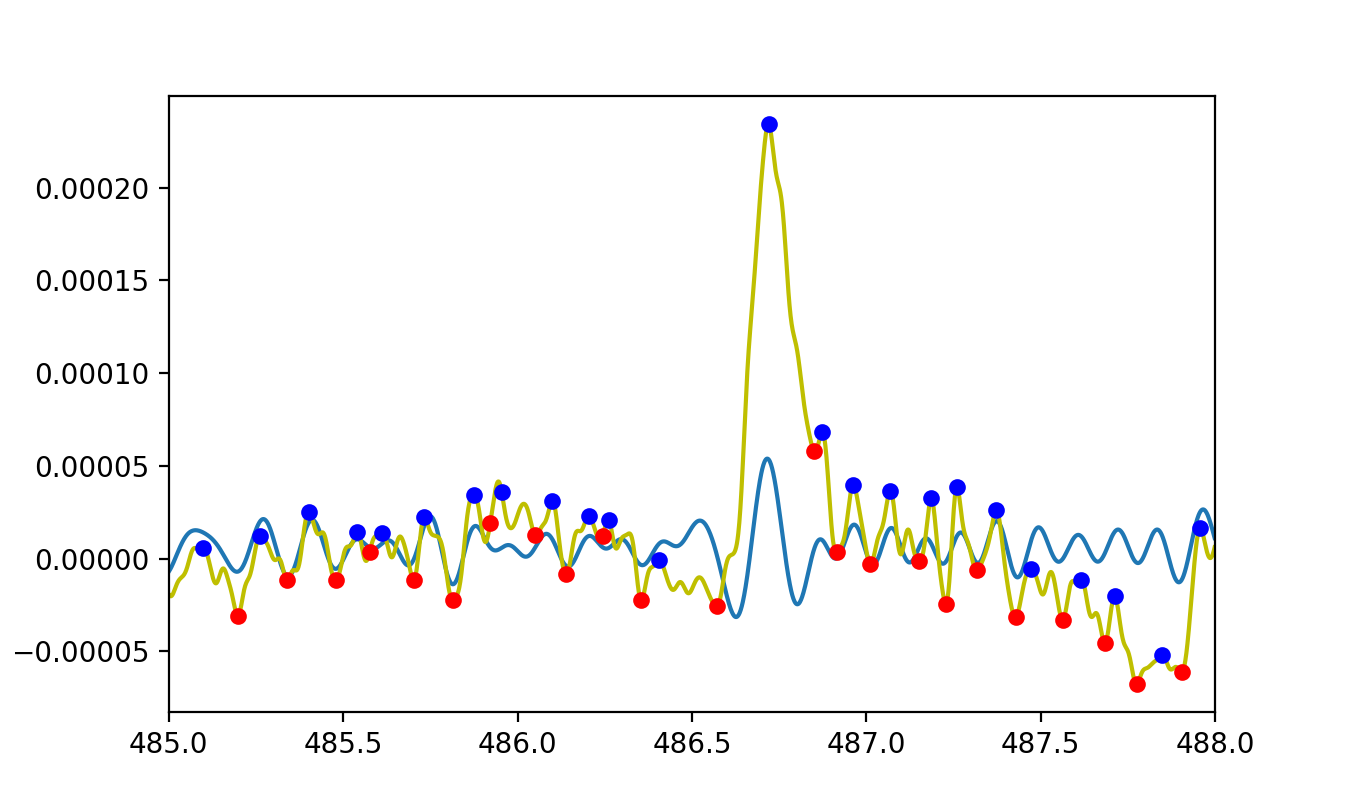

(485, 488)

In [47]:
t = time;
Fs = 1000;
tlim = (485, 488)
tidx = np.logical_and(t>=tlim[0], t<tlim[1])
tidxPs = Ps[np.logical_and(Ps>tlim[0]*Fs, Ps<tlim[1]*Fs)]
tidxTs = Ts[np.logical_and(Ts>tlim[0]*Fs, Ts<tlim[1]*Fs)]

plt.figure(figsize=(6.75,4.))
plt.plot(t[tidx], signal_theta[tidx])
plt.plot(t[tidx], signal_low[tidx], 'y')
plt.plot(t[tidxPs], signal_low[tidxPs], 'b.', ms=10)
plt.plot(t[tidxTs], signal_low[tidxTs], 'r.', ms=10)
plt.xlim(tlim)

In [48]:
pos = signal_theta[~np.isnan(signal_theta)]
pos

array([ 1.35379290e-05,  1.33919473e-05,  1.32277071e-05, ...,
       -1.11090120e-05, -1.16183175e-05, -1.21064845e-05])

In [53]:
signal_low = bandpass_filter(chan1,1000,(1,25));
signal_theta = bandpass_filter(chan1,1000,(4,10));
signal_low_theta = bandpass_filter(signal_low,1000,(4,10));

<IPython.core.display.Javascript object>


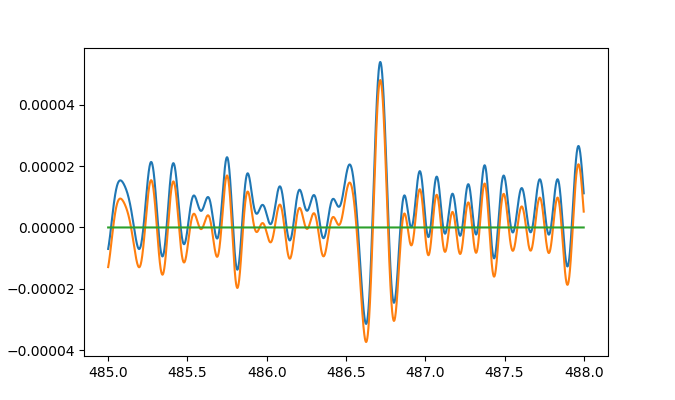

In [72]:
plt.figure(figsize=(6.75,4.))
#plt.plot(t[tidx], signal_low[tidx])
plt.plot(t[tidx], signal_theta[tidx])
plt.plot(t[tidx], signal_low_theta[tidx])
plt.plot(t[tidx],np.zeros((len(*np.nonzero(tidx)),1)))